In [1]:
# ! curl http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data > ./data/ionosphere.data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas

In [26]:
data = pandas.read_csv('./data/ionosphere.data', header=None) # Load data
train, test = train_test_split(data, test_size=0.3)
X_train = train[range(0, 34)]
y_train = train[34]
X_test = test[range(0, 34)]
y_test = test[34]

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
74,1,0,1.00000,0.05070,1.00000,0.10827,1.00000,0.19498,1.00000,0.28453,...,0.66643,0.63942,0.59417,0.69435,0.49538,0.72684,0.47027,0.71689,0.33381,0.75243
156,1,0,0.03852,0.02568,0.00428,0.00000,0.01997,-0.01997,0.02140,-0.04993,...,0.05136,0.01854,0.03994,0.01569,0.01997,0.00713,-0.02568,-0.01854,-0.01427,0.01997
344,1,0,0.76046,0.01092,0.86335,0.00258,0.85821,0.00384,0.79988,0.02304,...,0.77138,-0.00303,0.70886,0.01375,0.66161,0.00849,0.66298,0.01484,0.63887,0.01525
158,1,0,0.08696,0.00686,0.13959,-0.04119,0.10526,-0.08238,0.12586,-0.06178,...,0.15103,-0.10297,0.08467,0.01373,0.11213,-0.06636,0.09611,-0.07323,0.11670,-0.06865
85,1,0,0.39179,-0.06343,0.97464,0.04328,1.00000,1.00000,0.35821,0.15299,...,0.47015,0.16418,0.49309,0.14630,0.32463,-0.02612,0.39118,0.13521,0.34411,0.12755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1.00000,...,0.00000,0.00000,1.00000,0.22667,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
332,1,0,0.87578,0.03727,0.89951,0.00343,0.89210,0.00510,0.86335,0.00000,...,0.79503,-0.04348,0.82111,0.02033,0.81988,0.08696,0.80757,0.02308,0.80088,0.02441
330,1,0,0.82624,0.08156,0.79078,-0.08156,0.90426,-0.01773,0.92908,0.01064,...,0.91135,0.15957,0.89527,0.08165,0.77660,0.06738,0.92553,0.18085,0.92553,0.00000
267,1,0,0.58940,-0.60927,0.85430,0.55298,0.81126,0.07285,0.56623,0.16225,...,0.51872,0.26653,0.49013,0.27687,0.46216,0.28574,0.43484,0.29324,0.40821,0.29942


## Построение модели
Строится модель простого классификатора, для того чтобы оценить потом профит от подбора гиперпараметров

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def scores(y_true, y_pred):
    return { 
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, labels=['g', 'b'], pos_label='g'),
        "f1": f1_score(y_true, y_pred, labels=['g', 'b'], pos_label='g'),
        "recall": recall_score(y_true, y_pred, labels=['g', 'b'], pos_label='g'),
    }

classifier = SVC(kernel="linear")
model = classifier.fit(X_train, y_train)

y_predicted = classifier.predict(X_test)
scores(y_test, y_predicted)

{'accuracy': 0.9245283018867925,
 'precision': 0.9358974358974359,
 'f1': 0.948051948051948,
 'recall': 0.9605263157894737}

## Подбор гиперпараметров

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = { "kernel": ["linear", "rbf", "poly", "sigmoid"],
               "C": list(map(lambda x: x/10, range(1, 11, 1))) }

classifier = GridSearchCV(SVC(), param_grid=parameters)

model = classifier.fit(X_train, y_train)

print(model.best_params_)
classifier = model.best_estimator_
print(classifier.support_vectors_)

y_predicted = classifier.predict(X_test)
scores(y_test, y_predicted)

{'C': 0.3, 'kernel': 'rbf'}
[[ 1.       0.       0.65909 ...  0.       0.       0.     ]
 [ 0.       0.       1.      ...  1.       1.       1.     ]
 [ 1.       0.       0.43636 ... -0.36364  0.29091 -0.29091]
 ...
 [ 1.       0.       0.26667 ...  0.03333  0.41667 -0.05   ]
 [ 1.       0.       0.50112 ...  0.10562  0.60674 -0.0809 ]
 [ 1.       0.       1.      ...  0.85611  0.71493  0.75837]]


{'accuracy': 0.9528301886792453,
 'precision': 0.961038961038961,
 'f1': 0.9673202614379085,
 'recall': 0.9736842105263158}

## Визуализация

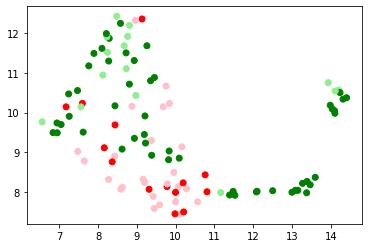

In [88]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
%matplotlib inline

umap_reducer = umap.UMAP()

y_test.name = "act"
_y = pandas.DataFrame(y_test)
Y = pandas.concat([_x1, pandas.Series(y_predicted, name="pred", index=_x1.index)], axis=1)
color_map = {"gg": "green", "bb": "red", "gb": "lightgreen", "bg": "pink"}
colors = Y.apply(lambda x: x['act'] + x['pred'], axis=1).map(color_map)


_data = X_test.values

scaled_data = RobustScaler().fit_transform(_data)
embedding_data = umap_reducer.fit_transform(scaled_data)

plt.scatter(embedding_data[:, 0], embedding_data[:, 1], c=colors)
